In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy import distance
from geopy.point import Point
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train =pd.read_csv(r"/content/drive/MyDrive/NYK/train.csv")
df_val =pd.read_csv(r"/content/drive/MyDrive/NYK/val.csv")
df_test=pd.read_csv(r"/content/drive/MyDrive/NYK/test.csv")
pd.set_option("display.max_columns",50)


In [4]:
df_train.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB


# 1-so we want to convert pickup_datetime from object to datetime
# 2-extract some features from time like hour ,month and so on

In [6]:
df_train["pickup_datetime"]=pd.to_datetime(df_train["pickup_datetime"])

In [7]:
df_train["pickup_hour"]=df_train["pickup_datetime"].dt.hour
df_train["pickup_month"]=df_train["pickup_datetime"].dt.month
df_train["pickup_day"]=df_train["pickup_datetime"].dt.day
df_train["pickup_dayofweek"]=df_train["pickup_datetime"].dt.day_name()
df_train["pickup_minute"]=df_train["pickup_datetime"].dt.minute

In [8]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_hour', 'pickup_month', 'pickup_day', 'pickup_dayofweek',
       'pickup_minute'],
      dtype='object')

In [9]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
vendor_id,1000000.0,1.534793,1.0,1.0,2.0,2.0,2.0,0.498788
pickup_datetime,1000000,2016-04-01 08:53:15.180106752,2016-01-01 00:00:53,2016-02-17 15:26:08,2016-04-01 15:01:29.500000,2016-05-15 02:35:38.750000128,2016-06-30 23:59:37,NaN
passenger_count,1000000.0,1.665353,0.0,1.0,1.0,2.0,7.0,1.315723
pickup_longitude,1000000.0,-73.973475,-121.933342,-73.991852,-73.981728,-73.967346,-61.335529,0.065404
pickup_latitude,1000000.0,40.750947,34.359695,40.737372,40.754131,40.768379,51.881084,0.033745
dropoff_longitude,1000000.0,-73.973421,-121.933304,-73.991341,-73.979767,-73.963036,-61.335529,0.065432
dropoff_latitude,1000000.0,40.751829,34.359695,40.735928,40.754551,40.769833,43.921028,0.035782
trip_duration,1000000.0,954.884971,1.0,397.0,662.0,1074.0,2227612.0,3882.070116
pickup_hour,1000000.0,13.604165,0.0,9.0,14.0,19.0,23.0,6.400685
pickup_month,1000000.0,3.515209,1.0,2.0,4.0,5.0,6.0,1.681171


# 1-the max of trip_duration is 2227612.0 ,how??
# 2-the min and max for passenger_count are 0 and 7 , how?

In [10]:
# i will use log for it
df_train["log_trip_duration"]=np.log1p(df_train["trip_duration"])

In [11]:
print(df_train.isna().sum())
print(df_train.isnull().sum())
print(df_train.duplicated().sum())

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
pickup_month          0
pickup_day            0
pickup_dayofweek      0
pickup_minute         0
log_trip_duration     0
dtype: int64
id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
pickup_month          0
pickup_day            0
pickup_dayofweek      0
pickup_minute         0
log_trip_duration     0
dtype: int64
0


# let's investigate pickup_datetime

In [12]:
df_train["pickup_datetime"].max()

Timestamp('2016-06-30 23:59:37')

In [13]:
df_train["pickup_datetime"].min()

Timestamp('2016-01-01 00:00:53')

In [14]:
df_train["pickup_datetime"].max()-df_train["pickup_datetime"].min()

Timedelta('181 days 23:58:44')

# let's investigate passenger_count

In [15]:
df_train["passenger_count"].value_counts()

,count
passenger_count,
1,708628
2,143907
5,53635
3,41012
6,33287
4,19491
0,38
7,2


<Axes: xlabel='passenger_count'>

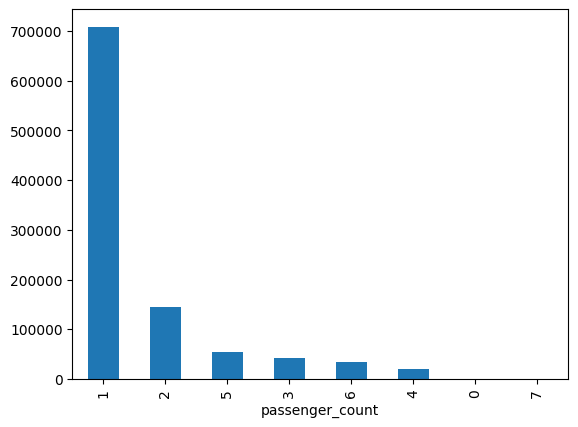

In [16]:
df_train["passenger_count"].value_counts().plot(kind="bar")

In [17]:
gp=df_train.groupby(["passenger_count"])["trip_duration"].sum()
gp

,trip_duration
passenger_count,
0,7022
1,655497674
2,143410183
3,42253624
4,20539344
5,57516325
6,35660759
7,40


In [18]:
gp=df_train.groupby(["passenger_count"])["trip_duration"].mean()
gp      # pov : i think taht 7 is outlier but 0 for delivery trips IDK

,trip_duration
passenger_count,
0,184.789474
1,925.023671
2,996.547652
3,1030.274651
4,1053.786055
5,1072.365526
6,1071.311894
7,20.000000


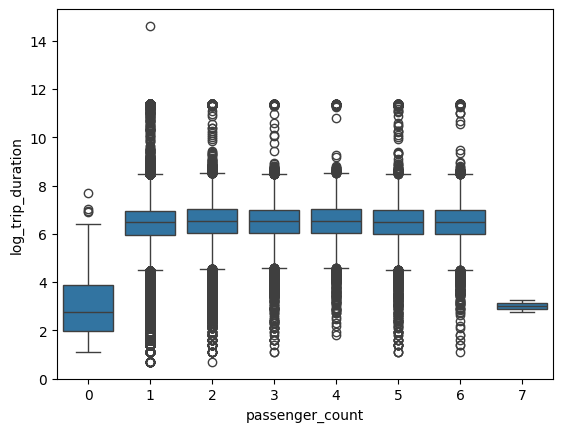

In [19]:
sns.boxplot(data=df_train,x=df_train["passenger_count"],y=df_train["log_trip_duration"])
plt.show()

# let's investigate vendor_id

In [20]:
df_train["vendor_id"].value_counts()

,count
vendor_id,
2,534793
1,465207


<Axes: xlabel='vendor_id'>

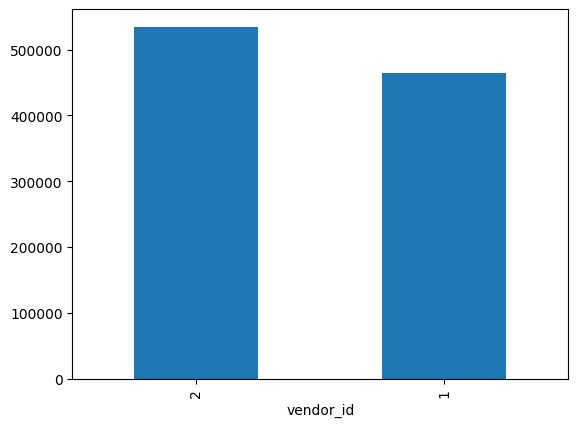

In [21]:
df_train["vendor_id"].value_counts().plot(kind="bar")

In [22]:
gp=df_train.groupby(["vendor_id"])["trip_duration"].sum()
gp

,trip_duration
vendor_id,
1,388526070
2,566358901


In [23]:
gp=df_train.groupby(["vendor_id"])["trip_duration"].mean()
gp

,trip_duration
vendor_id,
1,835.168151
2,1059.024522


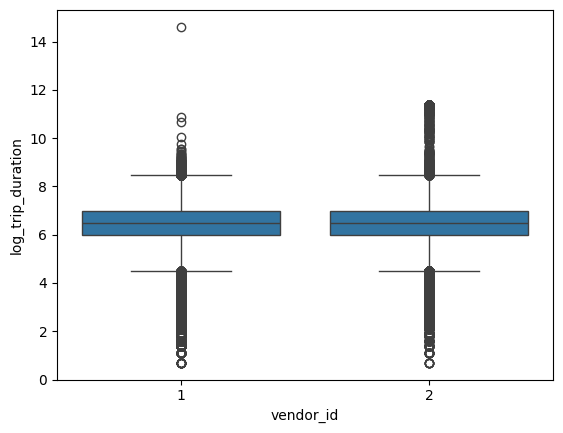

In [24]:
sns.boxplot(data=df_train,x=df_train["vendor_id"],y=df_train["log_trip_duration"])
plt.show()

# let's investigate store_and_fwd_flag

In [25]:
df_train["store_and_fwd_flag"].value_counts()

,count
store_and_fwd_flag,
N,994443
Y,5557


<Axes: xlabel='store_and_fwd_flag'>

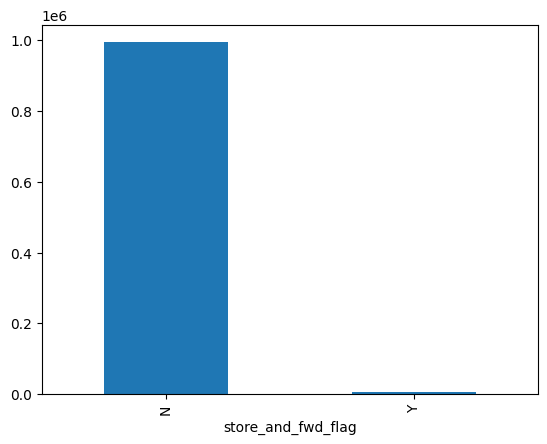

In [26]:
df_train["store_and_fwd_flag"].value_counts().plot(kind="bar")

In [27]:
gp=df_train.groupby(["store_and_fwd_flag"])["trip_duration"].sum()
gp

,trip_duration
store_and_fwd_flag,
N,948906877
Y,5978094


In [28]:
gp=df_train.groupby(["store_and_fwd_flag"])["trip_duration"].mean()
gp        # Y trips are longer than N

,trip_duration
store_and_fwd_flag,
N,954.209419
Y,1075.777218


# let's investigate trip_duration


In [29]:
df_train["trip_duration"].value_counts().nlargest(10)

,count
trip_duration,
348,1129
424,1125
417,1115
388,1111
386,1103
368,1093
367,1091
358,1091
408,1085


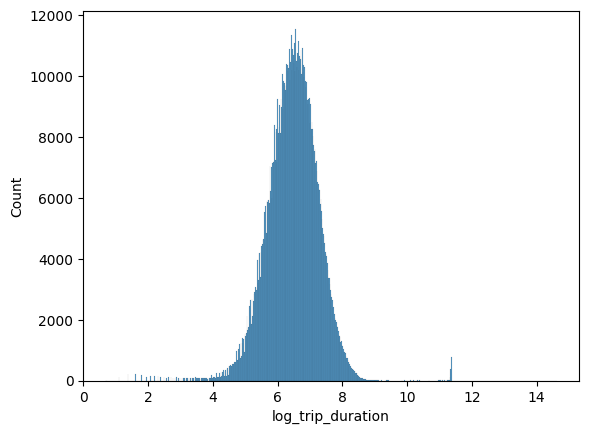

In [30]:
sns.histplot(df_train["log_trip_duration"])
plt.show()

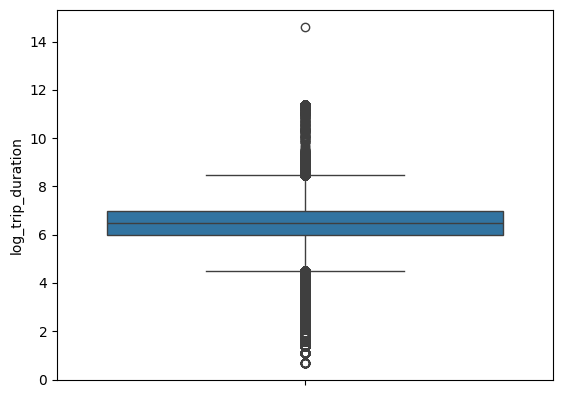

In [31]:
sns.boxplot(df_train["log_trip_duration"])
plt.show()  #see outliers

# let's investigate some time features

<Axes: xlabel='pickup_month'>

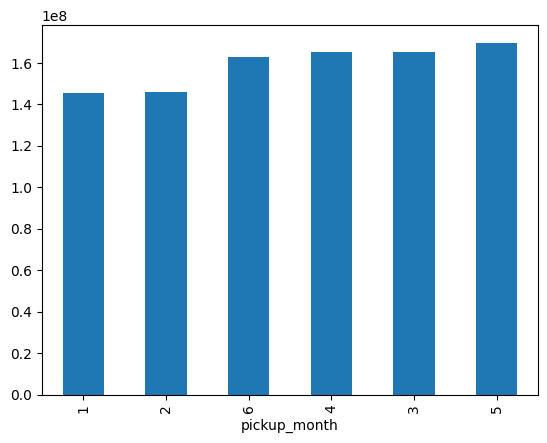

In [32]:
gp=df_train.groupby(["pickup_month"])["trip_duration"].sum()
gp.sort_values().plot(kind="bar")

<Axes: xlabel='pickup_hour'>

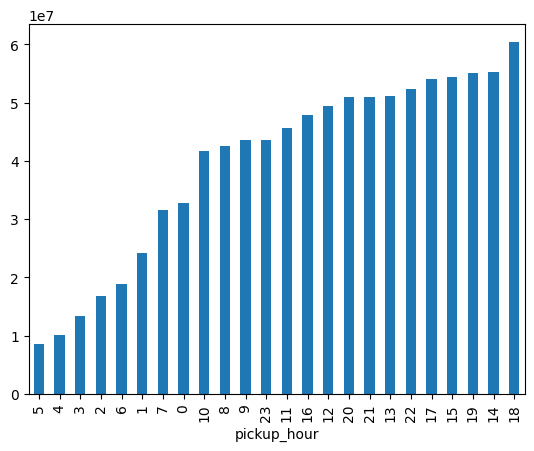

In [33]:
gp=df_train.groupby(["pickup_hour"])["trip_duration"].sum()
gp.sort_values().plot(kind="bar")

In [34]:
df_train["pickup_day"].value_counts()

,count
pickup_day,
16,34961
14,34895
12,34452
5,34437
4,33994
6,33979
9,33973
15,33943
13,33864


<Axes: xlabel='pickup_day'>

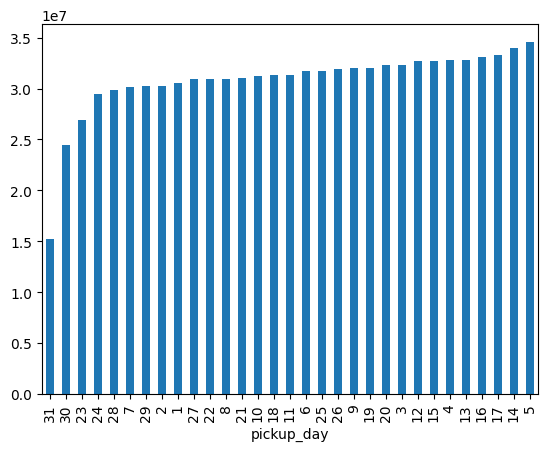

In [35]:
gp=df_train.groupby(["pickup_day"])["trip_duration"].sum()
gp.sort_values().plot(kind="bar")

<Axes: xlabel='pickup_dayofweek'>

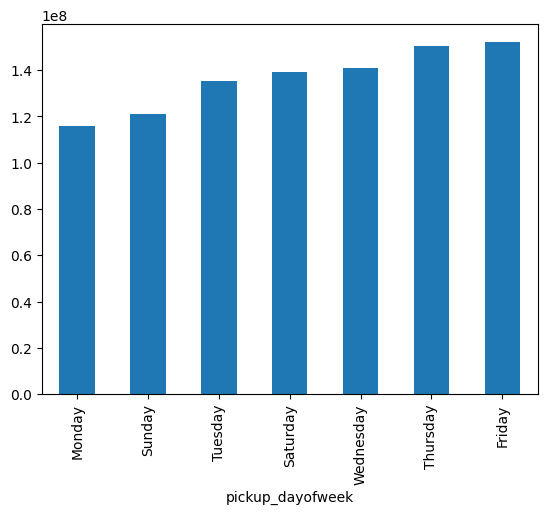

In [36]:
gp=df_train.groupby(["pickup_dayofweek"])["trip_duration"].sum()
gp.sort_values().plot(kind="bar")

In [37]:
df_train["is_weekend"]=((df_train["pickup_dayofweek"]=="Sunday") | (df_train["pickup_dayofweek"]=="Saturday")).astype(int)

In [38]:
df_train["is_weekend"].value_counts()

,count
is_weekend,
0,714225
1,285775


<Axes: xlabel='is_weekend'>

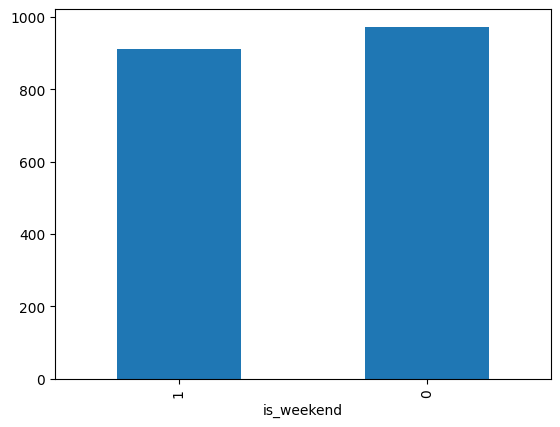

In [39]:
gp=df_train.groupby(["is_weekend"])["trip_duration"].mean()
gp.sort_values().plot(kind="bar")  # in weekends however 1 has 285775 and 0 has 714225 but equally in mean so in weekends the trips take long time

In [40]:
gp=df_train.groupby(["pickup_minute"])["trip_duration"].sum()
gp.sort_values()

,trip_duration
pickup_minute,
24,14941816
58,14994296
49,15010659
56,15032934
23,15151294
59,15286711
31,15306331
52,15336365
51,15337873


In [41]:
def range_minutes(x):
    if 1<=x<=15 :
        return 0   #Q1
    elif 16<=x<=30:
        return 1   #Q2
    elif 31<=x<=45:
        return 2   #Q3
    else:
        return 3   #Q4

In [42]:
df_train["range_minutes"]=df_train["pickup_minute"].apply(lambda x:range_minutes(x))

In [43]:
gp=df_train.groupby(["range_minutes"])["trip_duration"].sum()
gp.sort_values()  #almost no difference

,trip_duration
range_minutes,
3,234812276
1,237403500
2,238977893
0,243691302


In [44]:
gp=df_train.groupby(["range_minutes"])["trip_duration"].mean()
gp.sort_values()

,trip_duration
range_minutes,
3,931.543377
2,954.990961
1,955.384523
0,977.890546


In [45]:
def range_hours(x):
    if 5<=x<12 :
        return 0  # Morning
    elif 12<=x<17:
        return 1  # Afternoon
    else:
        return 2  # Night


In [46]:
df_train["range_hours"]=df_train["pickup_hour"].apply(lambda x:range_hours(x))

In [47]:
gp=df_train.groupby(["range_hours"])["trip_duration"].sum()
gp.sort_values()

,trip_duration
range_hours,
0,232407054
1,257883919
2,464593998


In [48]:
gp=df_train.groupby(["range_hours"])["trip_duration"].mean()
gp.sort_values()

,trip_duration
range_hours,
0,909.232317
2,925.753451
1,1063.276609


In [49]:
def range_months(x):
    if 1<=x<=2 :
        return 0  # winter
    elif 3<=x<=5:
        return 1  # spring
    else:
        return 2  # summer      #we know that data for 6 months from 1 to 6


In [50]:
df_train["range_months"]=df_train["pickup_month"].apply(lambda x:range_months(x))

In [51]:
gp=df_train.groupby(["range_months"])["trip_duration"].sum()
gp.sort_values()

,trip_duration
range_months,
2,162654388
0,291515263
1,500715320


In [52]:
gp=df_train.groupby(["range_months"])["trip_duration"].mean()
gp.sort_values()

,trip_duration
range_months,
0,907.158124
1,966.150682
2,1014.105367


# let's investigate some distance features

In [54]:
def haversine_distance(row):
    pick = Point(row['pickup_latitude'], row['pickup_longitude'])
    drop = Point(row['dropoff_latitude'], row['dropoff_longitude'])
    dist = distance.geodesic(pick, drop)
    return dist.km

In [55]:
def calculate_direction(row):
    pickup_coordinates =  Point(row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coordinates = Point(row['dropoff_latitude'], row['dropoff_longitude'])
    # Calculate the difference in longitudes
    delta_longitude = dropoff_coordinates[1] - pickup_coordinates[1]
    # Calculate the bearing (direction) using trigonometry
    y = math.sin(math.radians(delta_longitude)) * math.cos(math.radians(dropoff_coordinates[0]))
    x = math.cos(math.radians(pickup_coordinates[0])) * math.sin(math.radians(dropoff_coordinates[0])) - \
        math.sin(math.radians(pickup_coordinates[0])) * math.cos(math.radians(dropoff_coordinates[0])) * \
        math.cos(math.radians(delta_longitude))
    # Calculate the bearing in degrees
    bearing = math.atan2(y, x)
    bearing = math.degrees(bearing)
    # Adjust the bearing to be in the range [0, 360)
    bearing = (bearing + 360) % 360

    return bearing

In [56]:
def manhattan_distance(row):

    lat_distance = abs(row['pickup_latitude'] - row['dropoff_latitude']) * 111  # approx 111 km per degree latitude
    lon_distance = abs(row['pickup_longitude'] - row['dropoff_longitude']) * 111 * math.cos(math.radians(row['pickup_latitude']))  # adjust for latitude

    return lat_distance + lon_distance

In [57]:
df_train['distance_haversine'] = df_train.apply(haversine_distance, axis=1)
df_train['direction'] =   df_train.apply(calculate_direction, axis=1)
df_train['distance_manhattan'] = df_train.apply(manhattan_distance, axis=1)


In [58]:
df_train['distance_haversine'].describe()

,distance_haversine
count,1000000.000000
mean,3.440429
std,4.428006
min,0.000000
25%,1.232421
50%,2.091711
75%,3.870799
max,1240.510256


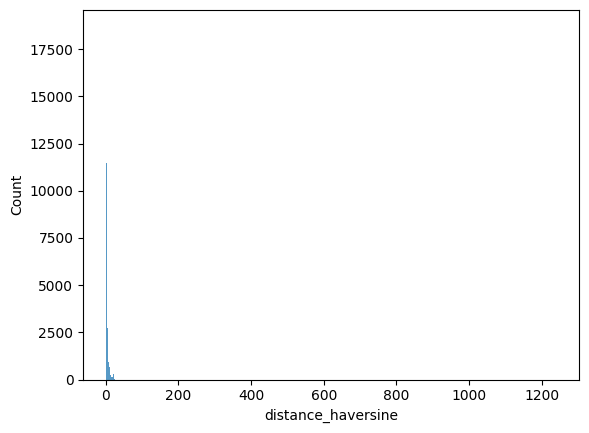

In [59]:
sns.histplot(df_train['distance_haversine'])
plt.show()

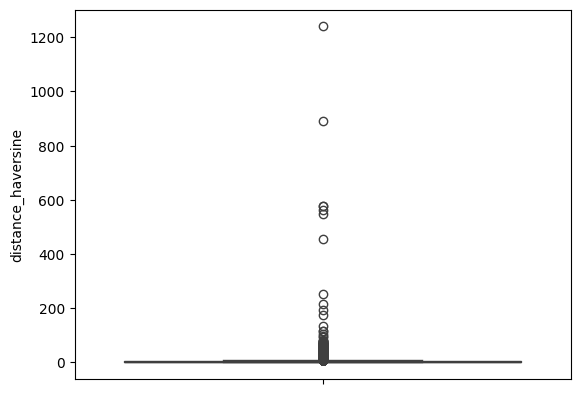

In [60]:
sns.boxplot(df_train['distance_haversine'])
plt.show()  # see the outliers

In [61]:
f=df_train['distance_haversine']>20
df_train[f]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_month,pickup_day,pickup_dayofweek,pickup_minute,log_trip_duration,is_weekend,range_minutes,range_hours,range_months,distance_haversine,direction,distance_manhattan
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,17,5,12,Thursday,43,8.510773,0,2,2,1,20.861805,306.979191,29.139010
12,id0088775,2,2016-04-14 18:29:44,1,-73.776665,40.645432,-73.968163,40.754810,N,2971,18,4,14,Thursday,29,7.996990,0,1,2,1,20.235383,307.056678,28.269340
21,id0874642,2,2016-06-10 01:45:44,1,-73.975868,40.746498,-73.699997,40.795990,N,1748,1,6,10,Friday,45,7.466799,0,2,2,2,23.930219,76.582828,28.692757
62,id1106419,2,2016-05-31 10:49:14,1,-73.781944,40.644691,-73.967003,40.798595,N,2980,10,5,31,Tuesday,49,8.000014,0,3,0,1,23.163689,317.717216,32.669482
90,id3475936,2,2016-01-03 17:30:18,6,-73.977119,40.764389,-73.784363,40.643372,N,2877,17,1,3,Sunday,30,7.964851,1,1,2,0,21.117850,129.567538,29.638281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999737,id3163537,2,2016-01-29 13:42:10,1,-73.781898,40.644650,-73.996422,40.732609,N,2609,13,1,29,Friday,42,7.867106,0,2,1,0,20.596990,298.471675,27.831235
999894,id0328398,1,2016-01-21 08:58:02,1,-73.997604,40.756657,-73.789085,40.641670,N,3308,8,1,21,Thursday,58,8.104401,0,3,0,0,21.763007,125.962618,30.296039
999929,id2898997,2,2016-04-05 22:16:15,2,-73.776741,40.645378,-73.963425,40.765919,N,1882,22,4,5,Tuesday,16,7.540622,0,1,2,1,20.689912,310.483909,29.102857
999974,id3977682,2,2016-01-07 23:38:32,4,-73.971069,40.758549,-73.734138,40.772141,N,2605,23,1,7,Thursday,38,7.865572,0,2,2,0,20.061604,85.591247,21.429571


In [62]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_hour', 'pickup_month', 'pickup_day', 'pickup_dayofweek',
       'pickup_minute', 'log_trip_duration', 'is_weekend', 'range_minutes',
       'range_hours', 'range_months', 'distance_haversine', 'direction',
       'distance_manhattan'],
      dtype='object')

In [63]:
df_train_corr=df_train[['vendor_id','passenger_count','pickup_hour', 'pickup_month', 'pickup_day','pickup_minute', 'log_trip_duration', 'is_weekend', 'range_minutes','range_hours', 'range_months', 'distance_haversine', 'direction','distance_manhattan']]

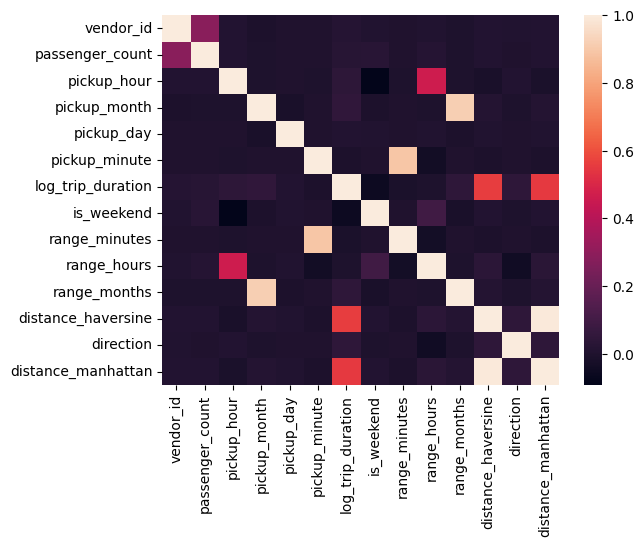

In [64]:
sns.heatmap(df_train_corr.corr())
plt.show()

# End of EDA